In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import IPython.display as ipd

In [153]:
dataset = datasets.make_blobs(n_samples=100 , n_features=2 , centers=[[5,5], [200,200]] , cluster_std=50)
# data , data[1]
data = dataset[0]
labels = dataset[1]

<Axes: >

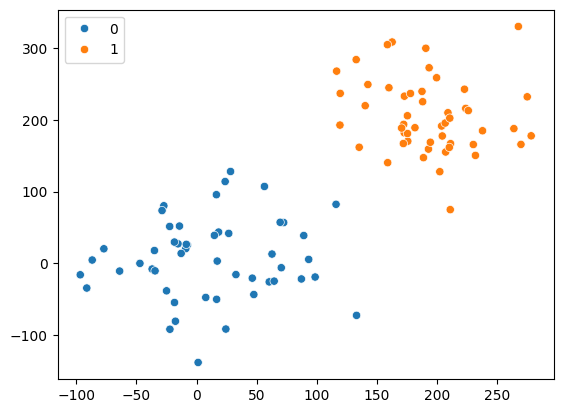

In [154]:
sns.scatterplot(x= data[:,0] , y = data[:,1] , hue = labels)

In [155]:
minx = min(data[:,0])
maxx = max(data[:,0])
x = np.linspace(minx , maxx , 200)
labels[labels == 0] = -1
data , labels

(array([[  70.44417988,   -6.39153766],
        [ 132.69876437,  284.32348482],
        [ 208.95710917,  210.16768897],
        [ 267.4903866 ,  330.63795504],
        [ -47.05911697,   -0.34722553],
        [  72.43294347,   56.67914023],
        [ 119.42443341,  237.15264761],
        [  69.50086563,   57.04317003],
        [ 158.87308706,  140.37281174],
        [  17.19300499,    2.8835978 ],
        [ -24.93365123,  -38.67962071],
        [ 222.69832443,  242.9712118 ],
        [  28.27086656,  128.05215299],
        [  23.78239486,  114.00639127],
        [ 210.88737551,   74.74225629],
        [ 199.53828433,  259.0451451 ],
        [ -63.91871384,  -11.10148417],
        [ 207.048133  ,  155.26963841],
        [ 119.19833407,  192.87690068],
        [ 133.00078696,  -72.98781337],
        [ 172.61372368,  182.11479013],
        [ -22.32384647,   51.25136292],
        [  -7.60090067,   25.20689016],
        [ 188.61374815,  147.36852881],
        [  26.75715972,   41.54846084],


In [192]:
def plotline(w , w0 , data , labels):
    w1 = w[0]
    w2 = w[1]
    slope = -w1/w2 
    intercept = -w0/w2
    slope , intercept

    minx = min(data[:,0])
    maxx = max(data[:,0])
    x = np.linspace(minx , maxx , 200)

    y = slope * x + intercept
    fig = plt.figure()
    plt.clf()
    sns.scatterplot(x = data[:,0] , y = data[:,1] , hue = labels , palette = 'RdYlGn')
    plt.plot(x , y , label = 'Decision Line' , color = 'blue' , linestyle = '-.')
    plt.legend()
    plt.show()
    ipd.clear_output(wait=True)
    ipd.display(fig)


# w = [np.random.random(20000) for i in range(2)]
w = np.random.random(2)
w0 = np.random.random()
w, w0

(array([0.97679572, 0.56003867]), 0.4249140579286581)

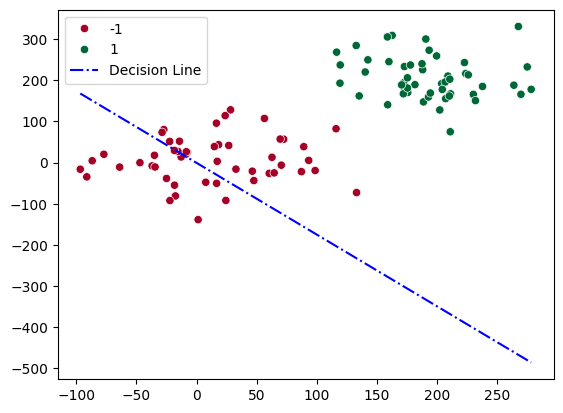

In [193]:
plotline(w , w0 , data , labels)

In [194]:
def gdistance(w , w0 , x):
    distance = (w @ x + w0) / np.linalg.norm(w)
    return distance


In [195]:
def perceptron(data , labels , w, w0 , iters = 10):
    w = w.astype(float)
    w0 = float(w0)
    for iter in range(iters):
        print('Iteration: ',iter +1)
        misclassifications = 0
        for xi , yi in zip(data , labels):
            # yi = float(yi)
            # print(type(xi) , type(yi))
            dir = np.sign(gdistance(w , w0 , xi))
            # print("predicted: ", dir , 'actual: ', np.sign(yi))
            if(np.sign(yi) != dir):
                misclassifications+= 1
                # update weights
                w = w + (xi * yi)
                w0 = w0 + yi
        plotline(w , w0 , data, labels)
        print('Updated Weights: ',w, w0)
        print('Misclassifications: ',misclassifications)
        if(misclassifications < 4):
            break

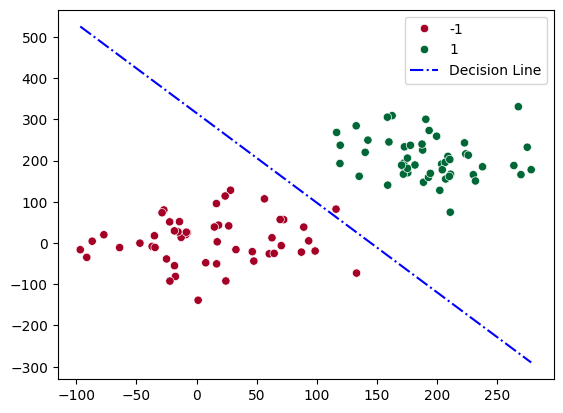

Updated Weights:  [13.37391311  6.14993994] -1937.5750859420714
Misclassifications:  17


In [196]:
perceptron(data, labels , w , w0 , 100)

In [127]:
for xi , yi in zip(data , labels):
    print(type(xi[0]) , type(float(yi)))
    break

<class 'numpy.float64'> <class 'float'>


## Implement perceptron on iris dataset:


In [198]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [202]:
sclaer = StandardScaler()
iris = load_iris()
x = iris.data
y = iris.target
x = x[y != 2]
y = y[y != 2]
x = sclaer.fit_transform(x)
y[y == 0] = -1

In [232]:
def perceptron2(data , labels , iters = 10):
    n = data.shape[0]
    m = data.shape[1]
    print(n, m)
    w = np.random.random(m)
    w0 = np.random.random()
    for iter in range(iters):
        misclassifications = 0
        for xi , yi in zip(data , labels):
            # yi = float(yi)
            # print(type(xi) , type(yi))
            dir = np.sign(gdistance(w , w0 , xi))
            # print("predicted: ", dir , 'actual: ', np.sign(yi))
            if(np.sign(yi) != dir):
                misclassifications+= 1
                # update weights
                w = w + (xi * yi)
                w0 = w0 + yi
        plotline(w , w0 , data, labels)
        print('Iteration: ',iter +1)
        print('Updated Weights: ',w, w0)
        print('Misclassifications: ',misclassifications)
        if(misclassifications == 0):
            break

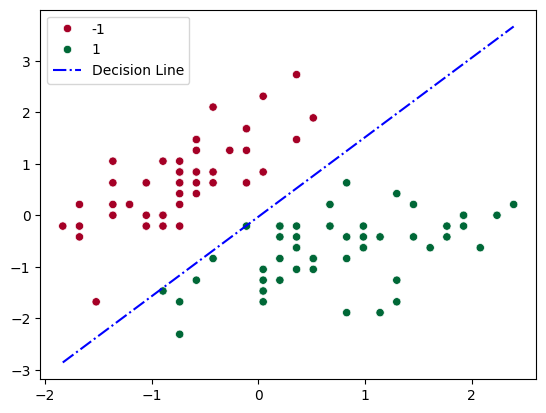

Iteration:  2
Updated Weights:  [ 1.26590909 -0.82107453  1.29290319  1.10384427] -0.022070297206217004
Misclassifications:  0


In [233]:
perceptron2(x , y , 100)

(100, 4)